# PROJECT DEFINITION

A project to predict wether a person in certain African countries has a bank account or not

# DATA PREPROCESSING/PREPARATION

In [1]:
# IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
# LOADING THE DATASET AND ITS DESCRIPTIONS
bank = pd.read_csv('Train.csv', encoding = 'utf-8')
des = pd.read_csv('VariableDefinitions.csv', encoding = 'utf-8')

In [5]:
bank.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [16]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)

des.head(14)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,"The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"
9,marital_status,"The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know"


In [17]:
bank.shape

(23524, 13)

CHECKING OUT THE DATASET


I want to check out each column of the dataset to know if they have missing values or any other inconsistencies that needs fixing. 
To do this I'll check for each column:
1. If they have missing values
2. If there are inconsistent values by checking the unique values of each column


In [30]:
bank.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [31]:
# CHECKING FOR MISSING VALUES
bank.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [35]:
print(bank['country'].value_counts())

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64


In [36]:
print(bank['year'].value_counts())

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64


In [18]:
print(bank['uniqueid'].value_counts())

uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64


CHECKING OUT AND DROPPING THE DUPLICATE COLUMNS

In [7]:
duplicates = bank[bank['uniqueid'].duplicated(keep = False)]
#duplicates.sort_values(by = 'uniqueid').head(30)
print(len(duplicates))

21409


In [10]:
display(bank[bank.duplicated(keep=False, subset=None)])

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [40]:
print(bank['bank_account'].value_counts())

No     20212
Yes     3312
Name: bank_account, dtype: int64


In [41]:
print(bank['location_type'].value_counts())

Rural    14343
Urban     9181
Name: location_type, dtype: int64


In [42]:
print(bank['cellphone_access'].value_counts())

Yes    17454
No      6070
Name: cellphone_access, dtype: int64


In [7]:
print(bank['household_size'].value_counts())

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64


In [8]:
print(bank['age_of_respondent'].value_counts())

30     1056
35      836
25      792
28      748
32      715
       ... 
100       5
93        4
96        3
99        2
97        1
Name: age_of_respondent, Length: 85, dtype: int64


In [45]:
print(bank['gender_of_respondent'].value_counts())

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64


In [46]:
print(bank['relationship_with_head'].value_counts())

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64


In [47]:
print(bank['marital_status'].value_counts())

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64


In [48]:
print(bank['education_level'].value_counts())

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64


In [49]:
print(bank['job_type'].value_counts())

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64


In [3]:
# Removing the unique id column because it'll have no value in the perdiction or analysis
bank = bank.drop('uniqueid', axis = 1)

In [18]:
bank.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


CONCLUSION:
1. This data doesn't seem to have any missing values
2. The dataset was collected within 3 years(2016, 2017, 2018)
3. I thought the data contains duplicates because unique id has duplicates, but on closer look, I realized it was not duplicates.(Its just that unique Id are sometimes repeated for different countries.
4. From the bank account column i noticed that most of the respondents do not have a bank account
5. There were more female than male respondents

# EXPLORATORY DATA ANALYSIS

I'll analyze this data in 3 ways
1. I'll analyze the distribution of the dataset with histograms(Numerical variables) and bar charts(Categorical variables)
2. I'll analyze the relationship of each pair of variables of the data with each other(heatmap)
3. I'll analyze the relationship of each variable with the target variable('bank account'), using grouped bar charts

In [16]:
# DIVIDING THE DATSET INTO NUMERICAL AND CATEGORICAL
Numerical = pd.DataFrame({'household_size' : bank['household_size'], 'age_of_respondent' : bank['age_of_respondent']})
Categorical = bank.drop(['household_size', 'age_of_respondent'], axis = 1)
Target = bank['bank_account']

DATA DISTRIBUTION ANALYSIS

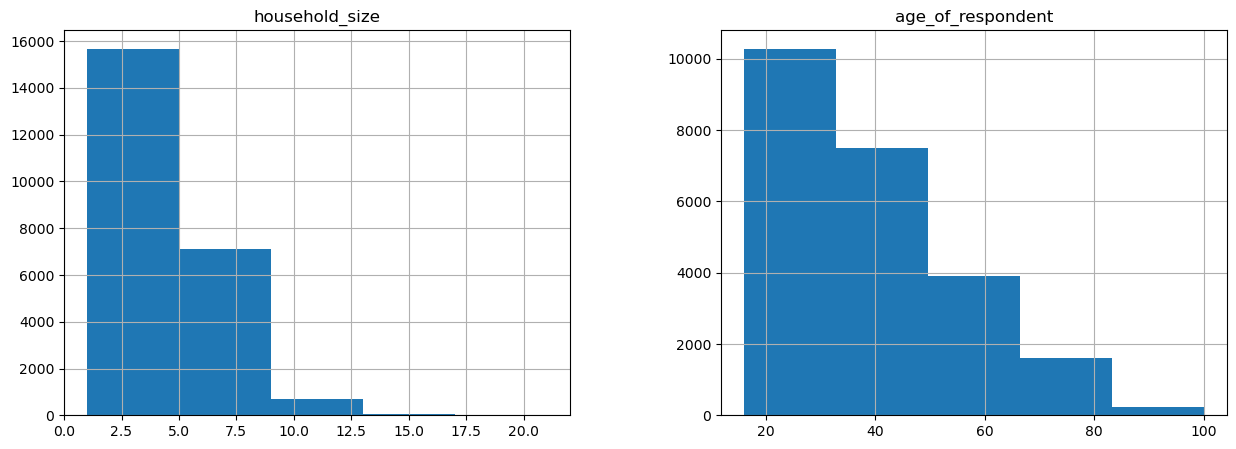

In [8]:
# Numerial data distribution
Numerical.hist(figsize=(15, 5), bins = 5)
plt.show()

C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_65872\2130436840.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_65872\2130436840.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_65872\2130436840.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_65872\2130436840.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
C:\Users\Nwachukwu Sarah\AppData\Local\Temp\ipykernel_65872\2130436840.py:20: UserWarning: FixedFormatter should only be

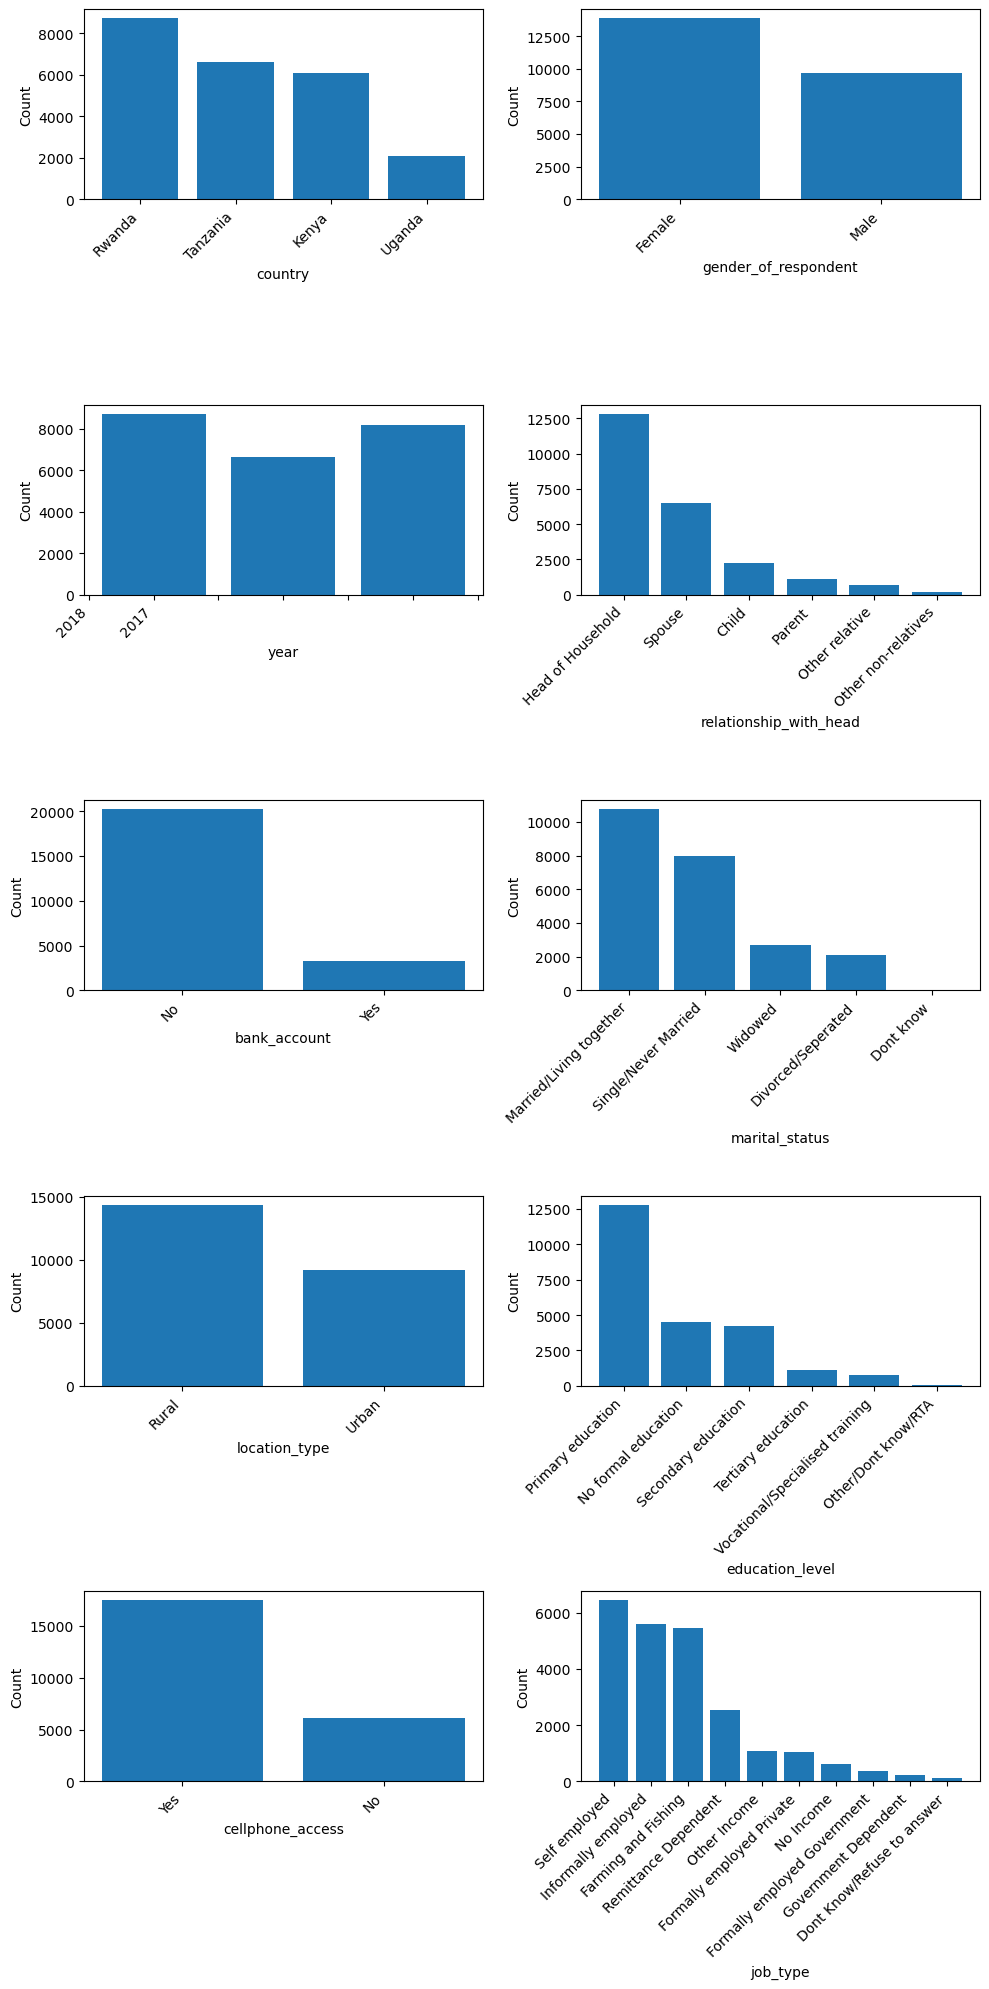

In [20]:
#Creating a way to access the subplots
row = 0
column = 0
#Create the subplots
fig, axs = plt.subplots(5, 2, figsize = (10, 20))


#loop throught the columns of the dataset
for columnname in Categorical.columns:
    #for each column do a value counts
    vc = Categorical[columnname].value_counts()
    
    #Get the counts and the the values in a seperate list
    x = vc.index.tolist()
    y = vc.values.tolist()
    #Plot a bar chart
    axs[row, column].bar(x, y)
    axs[row, column].set_xlabel(columnname)
    axs[row, column].set_ylabel('Count')
    axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')
    
    #Updating the way to access the subplots
    if row >= 4:
        row = 0
        column = 1
    else:
        row +=1


plt.tight_layout()
plt.show()

CONCLUSION (DISTRIBUTION ANALYSIS)
1. Most of the respondants have a house hold of 1-5
2. Most of the respondants are young i.e under 40
3. There were more female than male respondents
4. Most of the data was collected from Rwanda
5. This is an outdated dataset. It was collected 2016-2018, which is at least almost 7 years ago
6. Most of the data was collected from head of households and their spouse.
7. Most of the respondents have no bank account(The Dataset is Imbalanced)
8. Most of the respondents are married
9. Most of the respondents live in rural area
10. Most of them had only up to primary education but were not totally uneducated
11. Most of them had cellphone access
12. Most of them were self employed.


VARIABLE RELATIONSHIP ANALYSIS

I want to see the relationship between all the variables using heatmap. But most of the data are categorical variables with only two numerical variables. So i'll bin the numerical variable to make it categorical and then create a contingency table() and use cramer's V to measure the correlation between the variables

In [4]:
# Creating a new copy dataframe for relationship visualization and bining the numerical variables
relbank = bank.drop(['household_size', 'age_of_respondent'], axis = 1)
relbank['age_of_respondent'] = pd.cut(bank['age_of_respondent'], bins = 5, labels = ['Adolescent', 'Younger Adult', 'Older Adult', 'Elderly', 'Really Old'])
relbank['age_of_respondent'] = pd.cut(bank['age_of_respondent'], bins = 5, labels = ['Small', 'MidSize', 'Large', 'VeryLarge', 'ExtraLarge'])
relbank.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_of_respondent
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,Small
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,VeryLarge
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Small
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,MidSize
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,Small


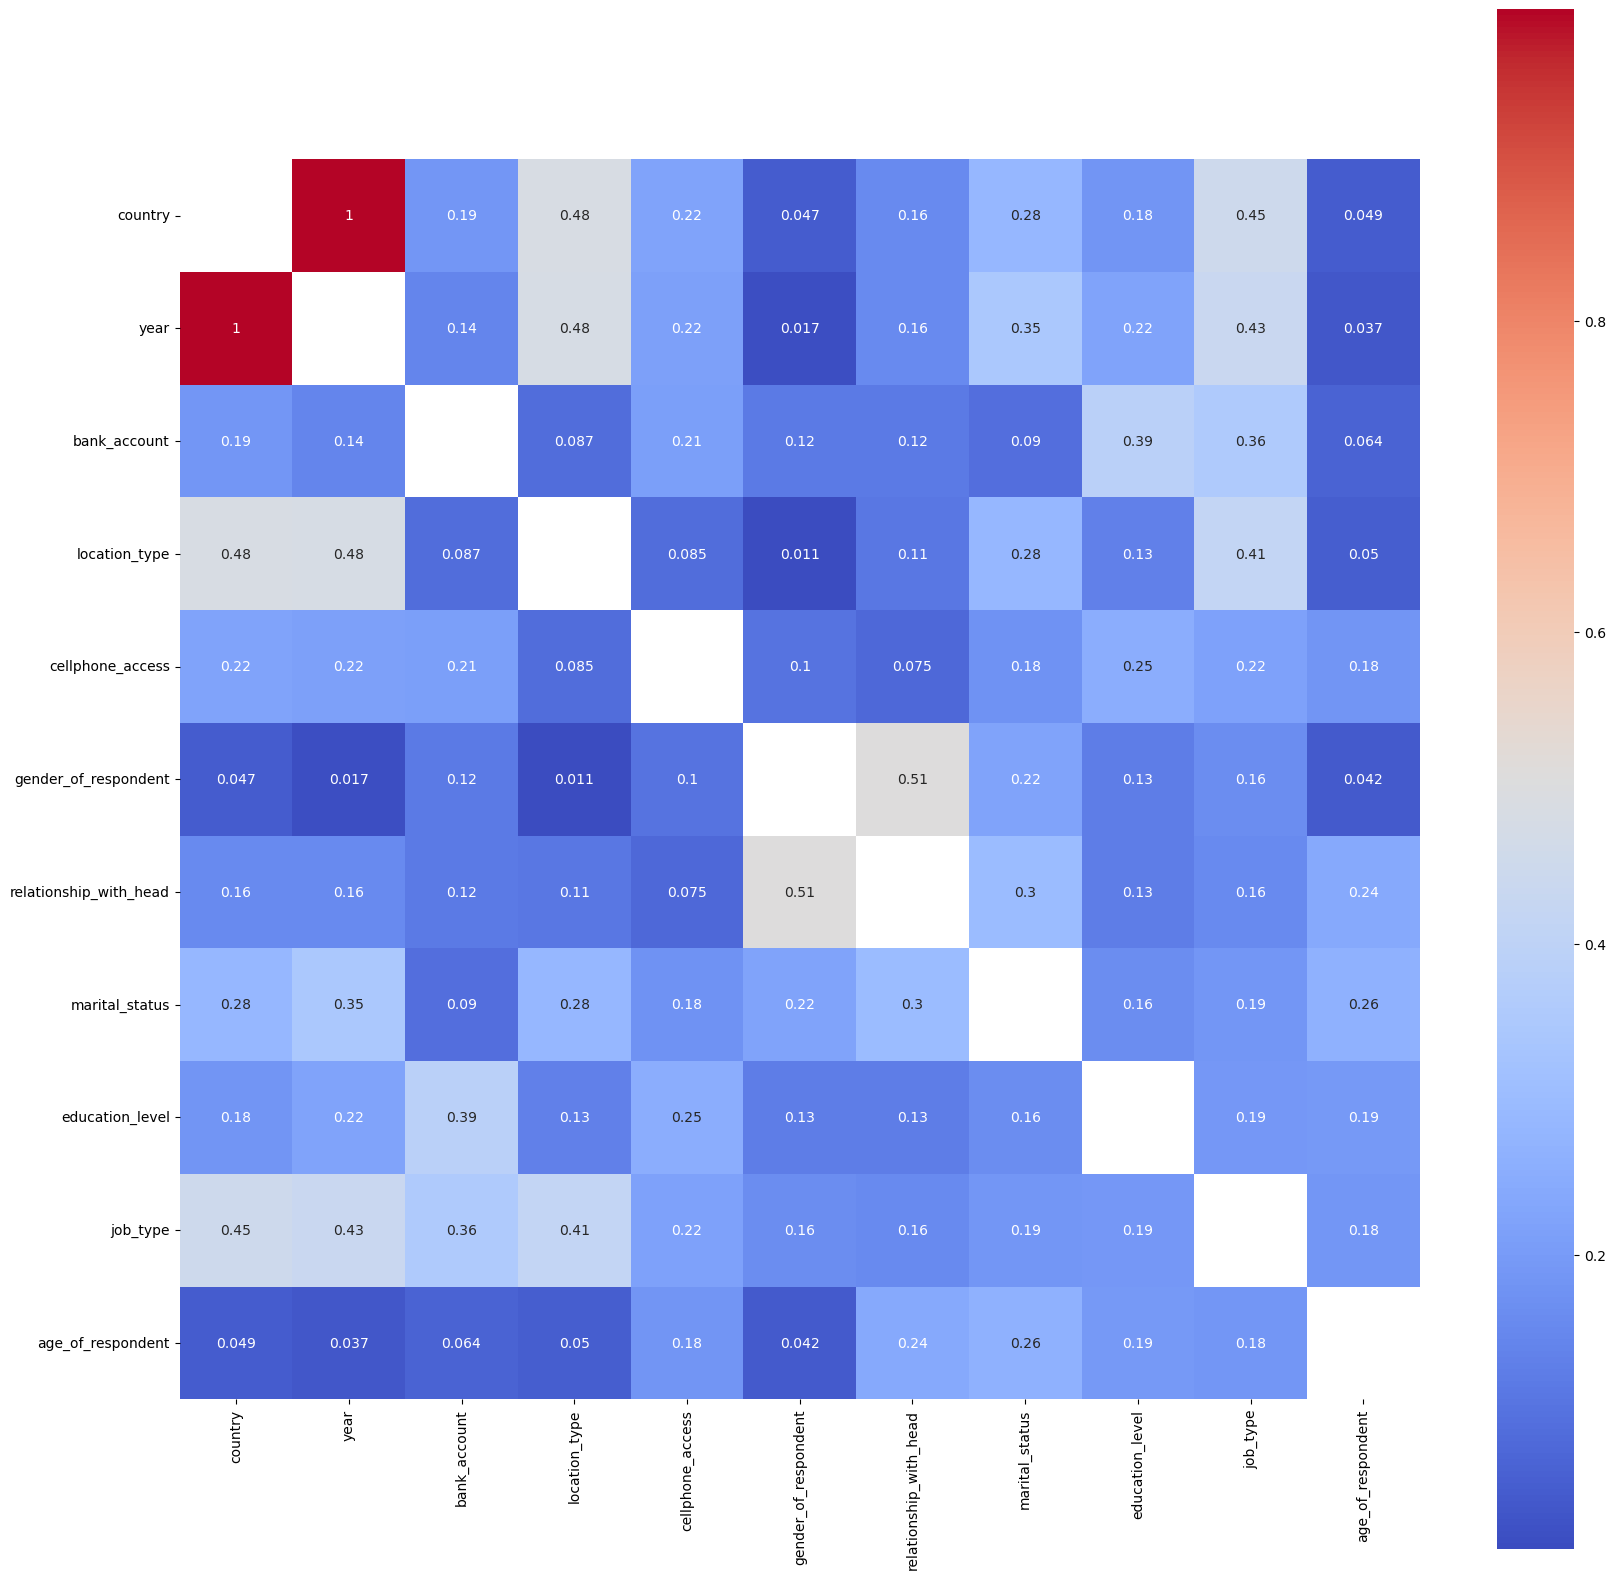

In [5]:
# Please run this column to see the heatmap. I happened to
from scipy.stats import chi2_contingency
corr_matrix = pd.get_dummies(relbank).corr()
cramers_v_matrix = pd.DataFrame(index = relbank.columns, columns = relbank.columns)
for col1 in relbank.columns:
    for col2 in relbank.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(relbank[col1], relbank[col2])
            chi2 = chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            r,k = contingency_table.shape
            phi2 = chi2/n
            phi2corr = max(0, phi2-(k-1)*(r-1)/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_v = np.sqrt(phi2corr/ min((kcorr-1), (rcorr-1)))
            
            cramers_v_matrix.loc[col1, col2] = cramers_v
#display(cramers_v_matrix)
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors ='coerce')
plt.figure(figsize=(20, 20))
sns.heatmap(cramers_v_matrix, annot = True, cmap='coolwarm', square = True)
plt.show()

<AxesSubplot:xlabel='country', ylabel='count'>

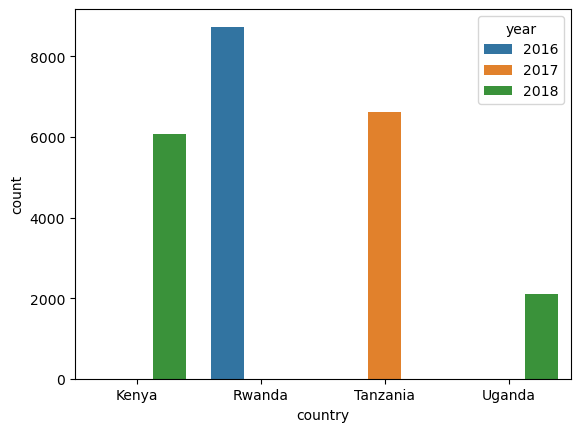

In [62]:
sns.countplot(x = 'country', hue = 'year', data = relbank)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

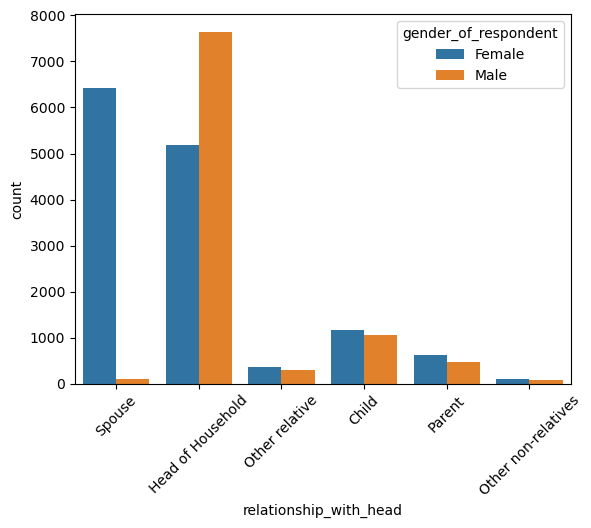

In [64]:
sns.countplot(x = 'relationship_with_head', hue = 'gender_of_respondent', data = relbank)
plt.xticks(rotation = 45)

In [ ]:
sns.countplot(x = 'relationship_with_head', hue = 'gender_of_respondent', data = relbank)

CONCLUSION (RELATIONSHIP ANALYSIS)
1. It seems that the correlation most of the columns with each other is seriously low. There is few exceptions
2. Year and Country is the only two variables with strong correlation. and looking it in more detail with a grouped bar chart. It seems that data was collected in all in the countries in different years except uganda and kenya which were collected in one year.
3. Another notable correlation is the relationship with head to gender. It has a medium correlation. I checked it out in detail, it didn't show much but it does show that mostly when relationship with head is spouse, then its a female respondent, when its head of household, then its a male respondent(This is an expected relationship which i don't think will help our model at all.
4. There are also some small but notable correlations between some other variables but they are small and i don't think they could help our models much.
5. The bank account variable has low correlation with most of the variables. But it does have some small(notable) correlation with jobtype and education level

ANALYZING RELATIONSHIP WITH TARGET VARIABLE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


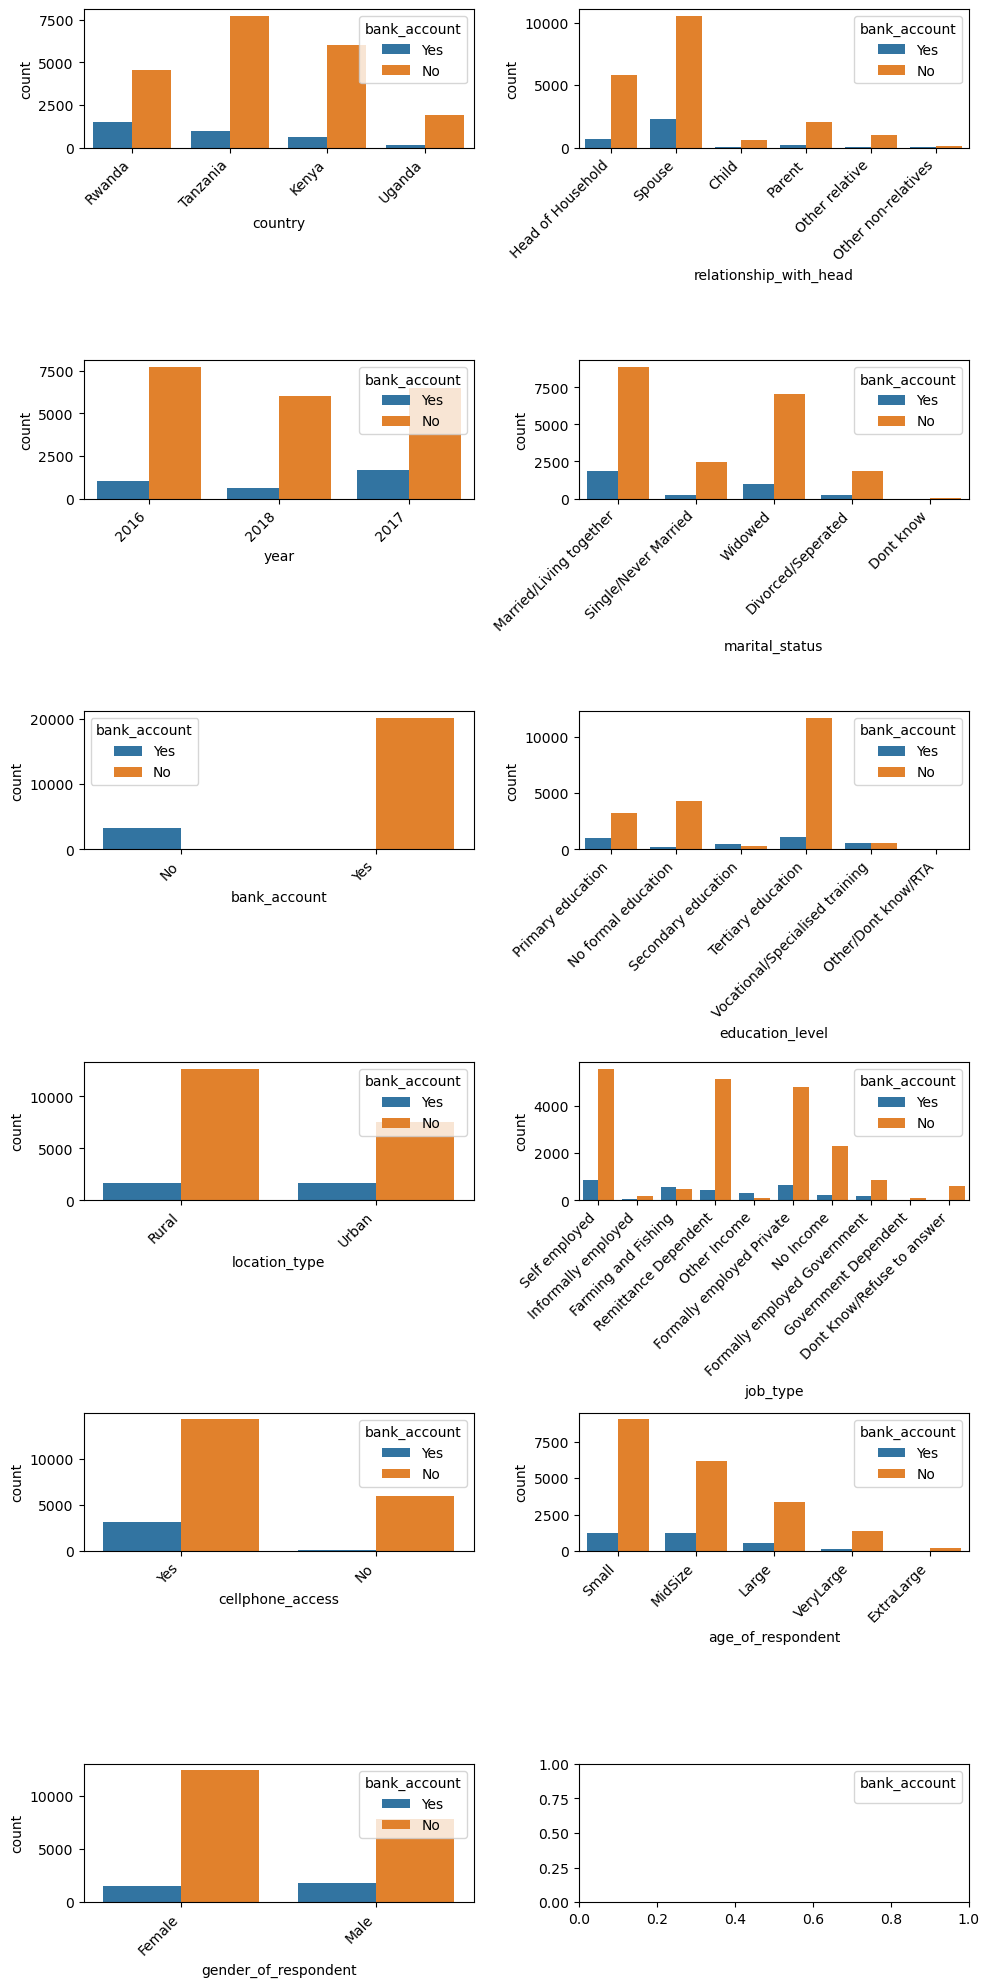

In [65]:
# Create the subplots
fig, axs = plt.subplots(6, 2, figsize = (10, 20))

# Create the counter for the subplopts
column = 0
row = 0

# Create the loop
for columnname in relbank.columns:
    # Plot the groupplot
    sns.countplot(x = columnname, hue = 'bank_account', data = relbank, ax = axs[row, column])
    axs[row, column].set_xticklabels(relbank[columnname].value_counts().index.tolist(), rotation = 45, ha = 'right')
    # Create a looping condition
    if row >= 5:
        row = 0
        column = 1
    else:
        row +=1
        
plt.legend(title='bank_account')
plt.tight_layout()
plt.show()

CONCLUSION(RELATIONSHIP WITH TARGET VARIABLE)
1. Most categories in each of the target variable has smaller number of people with bank account that those without(This is because of the imbalance of the dataset)
2. There are only few exceptions like other non-relatives in relationship with head, don't know in marital status, don't know in education level. They seem to have equal number of people with and without bank account.
3. I find it suspicious that in job type, Fishing and farming and other income, has more people who have bank account than not. While Formally employed private, Formally employed government has less people with bank account that not. (I mean, i thought all formally employed poeple should have a bank account. How are they paid if they don't have one.)

GENERAL CONCLUSION:
1. Most of the variables have a weak correlation with bank account.
2. I have concluded that if i want to train this data. I'll train it with the whole variables and then also with a training dataset that has variables with less than 0.2 correlation dropped. I think the later will work better. But i would like to do both. Then compare.

# MODEL DEVELOPEMENT/ EVALUATION

For my model development. I want to choose between Decision Tree and Random Forest models. They are the best classifying models that i think would work best for my categorical dataset. Both of them work with the Tree algorithm. I choose these models because both my target and independent variables are categorical and Tree algorithms work best for classifying categorical variables. For each of the model, I'll test it on both the whole features and on the three features with the highest correlation(From my HeatMap).

FITTING THE DATA TO THE DECISION TREE CLASSIFIER MODEL

In [26]:
# Testing with the whole variables
relbank['year'] = relbank['year'].astype('object')
x = pd.get_dummies(relbank.drop('bank_account', axis = 1), drop_first = True)
y = relbank['bank_account']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
DT = DecisionTreeClassifier(random_state=42)
DT.fit(xtrain,ytrain)
ypred = DT.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy: ' + str(accuracy))
print('Classification Report: ')
print(classification_report(ytest, ypred))
print('Confusion Matrix: ')
print(confusion_matrix(ytest, ypred))

C:\ProgramData\Anaconda3\Anaconda4\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Accuracy: 0.8845908607863975
Classification Report: 
              precision    recall  f1-score   support

          No       0.91      0.96      0.94      4063
         Yes       0.63      0.38      0.47       642

    accuracy                           0.88      4705
   macro avg       0.77      0.67      0.70      4705
weighted avg       0.87      0.88      0.87      4705

Confusion Matrix: 
[[3917  146]
 [ 397  245]]


In [21]:
# Testing with the three variables with correlation more than or equal to 0.2(I got the correlation from my heatmap)
x = pd.get_dummies(relbank[['cellphone_access', 'education_level', 'job_type']], drop_first = True)
y = relbank['bank_account']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
DT = DecisionTreeClassifier(random_state=42)
DT.fit(xtrain,ytrain)
ypred = DT.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy: ' + str(accuracy))
print('Classification Report: ')
print(classification_report(ytest, ypred))
print('Confusion Matrix: ')
print(confusion_matrix(ytest, ypred))

Accuracy: 0.8837407013815091
Classification Report: 
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      4063
         Yes       0.67      0.29      0.41       642

    accuracy                           0.88      4705
   macro avg       0.78      0.63      0.67      4705
weighted avg       0.87      0.88      0.86      4705

Confusion Matrix: 
[[3970   93]
 [ 454  188]]


  FITTING THE MODEL TO THE RANDOM FOREST MODEL

In [21]:
relbank['year'] = relbank['year'].astype('object')
x = pd.get_dummies(relbank.drop('bank_account', axis = 1), drop_first = True)
y = relbank['bank_account']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
RFC = RandomForestClassifier(random_state=42)
RFC.fit(xtrain,ytrain)
ypred = RFC.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy: ' + str(accuracy))
print('Classification Report: ')
print(classification_report(ytest, ypred))
print('Confusion Matrix: ')
print(confusion_matrix(ytest, ypred))

C:\ProgramData\Anaconda3\Anaconda4\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Accuracy: 0.8801275239107332
shape:  (4705, 35)
Classification Report: 
              precision    recall  f1-score   support

          No       0.90      0.96      0.93      4063
         Yes       0.60      0.36      0.45       642

    accuracy                           0.88      4705
   macro avg       0.75      0.66      0.69      4705
weighted avg       0.86      0.88      0.87      4705

Confusion Matrix: 
[[3910  153]
 [ 411  231]]


In [23]:
relbank['year'] = relbank['year'].astype('object')
x = pd.get_dummies(relbank[['cellphone_access', 'education_level', 'job_type']], drop_first = True)
y = relbank['bank_account']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
RFC = RandomForestClassifier(random_state=42)
RFC.fit(xtrain,ytrain)
ypred = RFC.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy: ' + str(accuracy))
print('Classification Report: ')
print(classification_report(ytest, ypred))
print('Confusion Matrix: ')
print(confusion_matrix(ytest, ypred))

Accuracy: 0.8841657810839533
Classification Report: 
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      4063
         Yes       0.67      0.30      0.42       642

    accuracy                           0.88      4705
   macro avg       0.78      0.64      0.68      4705
weighted avg       0.87      0.88      0.86      4705

Confusion Matrix: 
[[3966   97]
 [ 448  194]]


CONCLUSION:

After testing the two models(both on the whole independent variable and only three independent variables), I have concluded that the Random Forest Classifer model on the three variables is the best. 
It has the greatest accuracy. and Looking at the precision(from classification report), it has an above average precision for Yes(People that have bank account) which is desireable because the data is imbalanced and i was worried that it might not predict correctly for people that have a bank account since the frequency is low. 
You might notice the Decision Tree classifier with the entire variables has a slightly better accuracy, but its precision with the Yes category is lower. it means that the Random Forest Classifier Performs better for the Yes Category than the Decision Tree Classifier.
So overall i think the last Random Forest Classifier is the best which is why I choose it for my deployment.

# PROJECT DEPLOYMENT

For deployment I created a simple tkinter window, where a user can choose options form the drop down menu and click on predict to predict if a person has a bank account or not (The function contains everything, So you can just run it to predict without having to run other cells of this notebook)

In [25]:
# Importing the neccessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import tkinter as tk

# Loading the data
bank = pd.read_csv('Train.csv', encoding = 'utf-8')

# Removing the unique id column because it'll have no value in the perdiction or analysis
bank = bank.drop('uniqueid', axis = 1)

# Fitting the most suitable features of the data to the most suitable model
x = pd.get_dummies(bank[['cellphone_access', 'education_level', 'job_type']], drop_first = True)
y = bank['bank_account']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
RandForest = RandomForestClassifier(random_state=42)
RandForest.fit(xtrain,ytrain)

# Creating a function that the predict button will execute to predict if a person has a bank account or not
def predictHasAccount():
    label.config(text = 'Predicting...')
    preddata = pd.DataFrame(columns = x.columns)
    if cellphone_access.get() == 'Yes':
        cellphone = 1
    else:
        cellphone = 0
    data = {'cellphone_access_Yes' :cellphone, 'education_level_' + str(education_level.get()) :1, 'job_type_' + str(job_type.get()) :1}
    preddata.loc[0] = data
    predready = preddata.fillna(0)
    predvalue = RandForest.predict(predready)
    if predvalue[0] == 'Yes':
        parent.after(1000, lambda: label.config(text = "This Person has a Bank Account"))
    else:
        parent.after(1000, lambda: label.config(text = "This Person Doesn't have a Bank Account"))
        
    
# Creating the simple tkinter user interface
parent = tk.Tk()
parent.title('BANK ACCOUNT PREDICTOR')
education_level = tk.StringVar(parent)
education_level.set("What is the Person's Highest Education Level?")
edu_option = tk.OptionMenu(parent, education_level, 'Primary education', 'No formal edcation', 'Secondary education', 'Tertiary education', 'Vocational/Specialised training', 'Other/Dont Know/RTA')
edu_option.pack()
    
job_type = tk.StringVar(parent)
job_type.set('What Type of Job is the Person Currently Doing?')
job_option = tk.OptionMenu(parent, job_type, 'Self employed', 'Farming and Fishing', 'Remittance Dependent', 'Informally employed', 'Other Income', 'Formally employed Private', 'No Income', 'Formally employed Government', 'Government Dependent', 'Dont Know/Refuse to answer')
job_option.pack()
    
cellphone_access = tk.StringVar(parent)
cellphone_access.set('Does the person have access to a cellphone?')
cellphone_option = tk.OptionMenu(parent, cellphone_access, 'Yes', 'No')
cellphone_option.pack()

button = tk.Button(parent, text='PREDICT', command = predictHasAccount)
button.pack()

label = tk.Label(parent, text = "")
label.pack()
    
parent.mainloop()